Research idea:  The issue of data analysis is to examine enforcement practices of GDPR inside the EU. 
First, for data analysis, two datasets were created in Excel (“Book1.xlsx” and “Book2.xlsx”) with information collected from GDPR Enforcement Tracker traced by CMS Legal Services EEIG. 

Methodology: In this Jupiter Notebook the first dataset (“Book2.xlsx”) is used. Dataset represents enforcement procedures in 27 Member States of the EU, excluding the information from the UK. It consists of 3 columns: "Country", "Fine2" and Population".
For analysis of data NumPy and Panda Python libraries are used. For visualization Seaborn Python library is used. 

Problem: During the examination of the dataset, the main question was calculation GDPR fines per capita in the EU in the timeframe from May 2018 to June 2020 and after visualization of the results of the computation. 

Data analysis consisted of numerous steps :
 
1)Examination and analysis of the data set.

2)Calculation.

3)Data visualization.

4)Communicating results (this part was not placed in the Jupiter Notebook, but was introduced in Thesis). 

# 1. Data analysis 

1.1. The first step is to import all the libraries that will be used for the data analysis.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.2. The second step is to upload the Data Set.

In [51]:
GDPR = pd.read_excel("Book2.xlsx")

1.3. A further step is to display basic statistical details like count, mean, std, first, second and third percentile, min and max boundaries of a data frame of numeric values.

In [52]:
GDPR.describe()

,Fine2,Population
count,27.000000,2.700000e+01
mean,11.333333,1.660403e+07
std,17.045189,2.213582e+07
min,1.000000,3.412430e+05
25%,2.000000,4.521526e+06
50%,7.000000,9.006398e+06
75%,10.000000,1.436225e+07
max,85.000000,8.378394e+07


1.4. To check a concise summary of the data frame  .info() function is used, which provides a general picture of the dataset that is used for research. 

In [54]:
GDPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
Country       27 non-null object
Fine2         27 non-null int64
Population    27 non-null int64
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


# 2.Calculation

2.1. To analyze further differences in GDPR enforcement, GDPR fines per capita in the EU in the timeframe from May 2018 to June 2020 were calculated.
The formula for per capita is:
Measurement / Population = Measurement per capita
It is important to multiply by 1 000 000 so the numbers per capita would not be small and complicated to compare.[1]

In [55]:
GDPR[['Fine2', 'Population']] = GDPR[['Fine2', 'Population']].apply(pd.to_numeric)
GDPR['Population'] = GDPR['Population']
GDPR['Percap'] = GDPR['Fine2'] * 1e6 / GDPR['Population']

2.2. With the help of the print () function, it is easy to take a look at the result of the calculation. 

In [56]:
print (GDPR['Percap'])

0     1.817996
1     1.767364
2     2.898445
3     0.298387
4     2.878342
5     1.035409
6     0.933796
7     0.165394
8     1.475677
9     6.622374
10    0.767529
11    1.282135
12    0.184957
13    0.777225
14    1.035875
15    0.594103
16    0.076601
17    0.721928
18    0.392283
19    5.860926
20    0.116721
21    1.060334
22    0.405040
23    0.243590
24    0.753844
25    0.367338
26    2.264785
Name: Percap, dtype: float64


# 3. Data visualization 

3.1. To visualize the GDPR fines per capita in the EU countries the Seaborn library is used. The calculation of per capita is plotted against column 'Country', to see the distribution of variables in ascending order. 

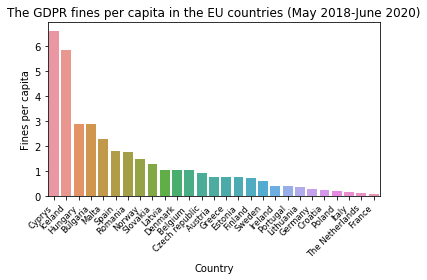

In [57]:
sns.barplot(x='Country', y="Percap", data=GDPR, 
            order=GDPR.sort_values('Percap',ascending = False).Country)
plt.xlabel("Country", size=10)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.ylabel("Fines per capita", size=10)
plt.title('The GDPR fines per capita in the EU countries (May 2018-June 2020)', size=12)
plt.tight_layout()

# Bibliography 

1. Kimberly Amadeo, Per Capita, What It Means, Calculation, How to Use It, The Balance, June 11, 2020. Available at:https://www.thebalance.com/per-capita-what-it-means-calculation-how-to-use-it-3305876